### Clone the repository

In [1]:
!git clone https://github.com/waleedrazakhan92/face_recognition.git
%cd face_recognition/

Cloning into 'face_recognition'...
remote: Enumerating objects: 33, done.
remote: Counting objects: 100% (33/33), done.
remote: Compressing objects: 100% (31/31), done.
remote: Total 33 (delta 15), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (33/33), done.
/content/face_recognition


### Download pretrained models

In [2]:
# download dlib
!wget https://raw.github.com/ageitgey/face_recognition_models/master/face_recognition_models/models/shape_predictor_68_face_landmarks.dat

# download face recognition model
!wget https://raw.github.com/ageitgey/face_recognition_models/master/face_recognition_models/models/dlib_face_recognition_resnet_model_v1.dat


--2022-04-08 08:14:32--  https://raw.github.com/ageitgey/face_recognition_models/master/face_recognition_models/models/shape_predictor_68_face_landmarks.dat
Resolving raw.github.com (raw.github.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.github.com (raw.github.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://raw.githubusercontent.com/ageitgey/face_recognition_models/master/face_recognition_models/models/shape_predictor_68_face_landmarks.dat [following]
--2022-04-08 08:14:32--  https://raw.githubusercontent.com/ageitgey/face_recognition_models/master/face_recognition_models/models/shape_predictor_68_face_landmarks.dat
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 20

In [3]:
from argparse import Namespace
import time
import os
import sys
import numpy as np
import torch
import torchvision.transforms as transforms

import PIL
from PIL import Image
import scipy
import scipy.ndimage
import dlib
from glob import glob
import dlib

%load_ext autoreload
%autoreload 2

### Loading pretrained models

In [4]:
# Load the models
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")
detector = dlib.get_frontal_face_detector()
face_rec_model = dlib.face_recognition_model_v1('dlib_face_recognition_resnet_model_v1.dat')


# Face Recognition


## Overview

Face reconition is a process in which a face image is identified as one of the registered faces of people in the database. It has many uses renging from face unlocking in a mobile, to face verification to enter or exit a building. It's a fast and often reliable method to use as a protection system.
To have a very basic idea about it, you can watch the lectures of Andrew Ng.


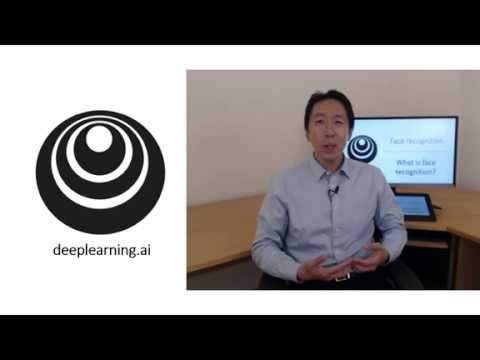

In [5]:
from IPython.display import YouTubeVideo
YouTubeVideo('-FfMVnwXrZ0')

## Face Recognition Process
A face recognition system comprises of the following steps:


*   Face Detection: This is the part where a face is detected in a given input image.
*   Face Alignment: Once a face is succesfully found in an input image, this face is cropped and aligned for the model.
*   Feature Extraction: An aligned face is given to a feature extraction model. This model takes an input image and extract distinguishable features out of the given face.
*   Face Recognition: The features of the input image are compared against the features of all the images in the databse and the closest features are identified as the person.


The figure below explains the above steps as a visual:
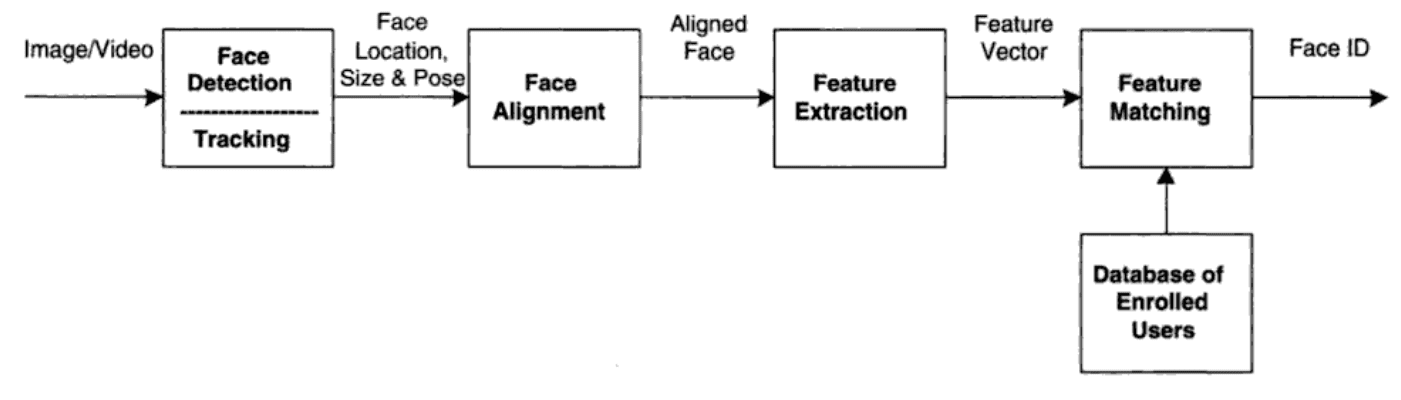
Note: The figure is taken from https://machinelearningmastery.com/introduction-to-deep-learning-for-face-recognition/

## Dataset
The dataset used in this notebook is http://vis-www.cs.umass.edu/lfw/.
This dataset comprises of 13000+ images from more than 5500 people. For experimental purposes we are using only a few of them. 


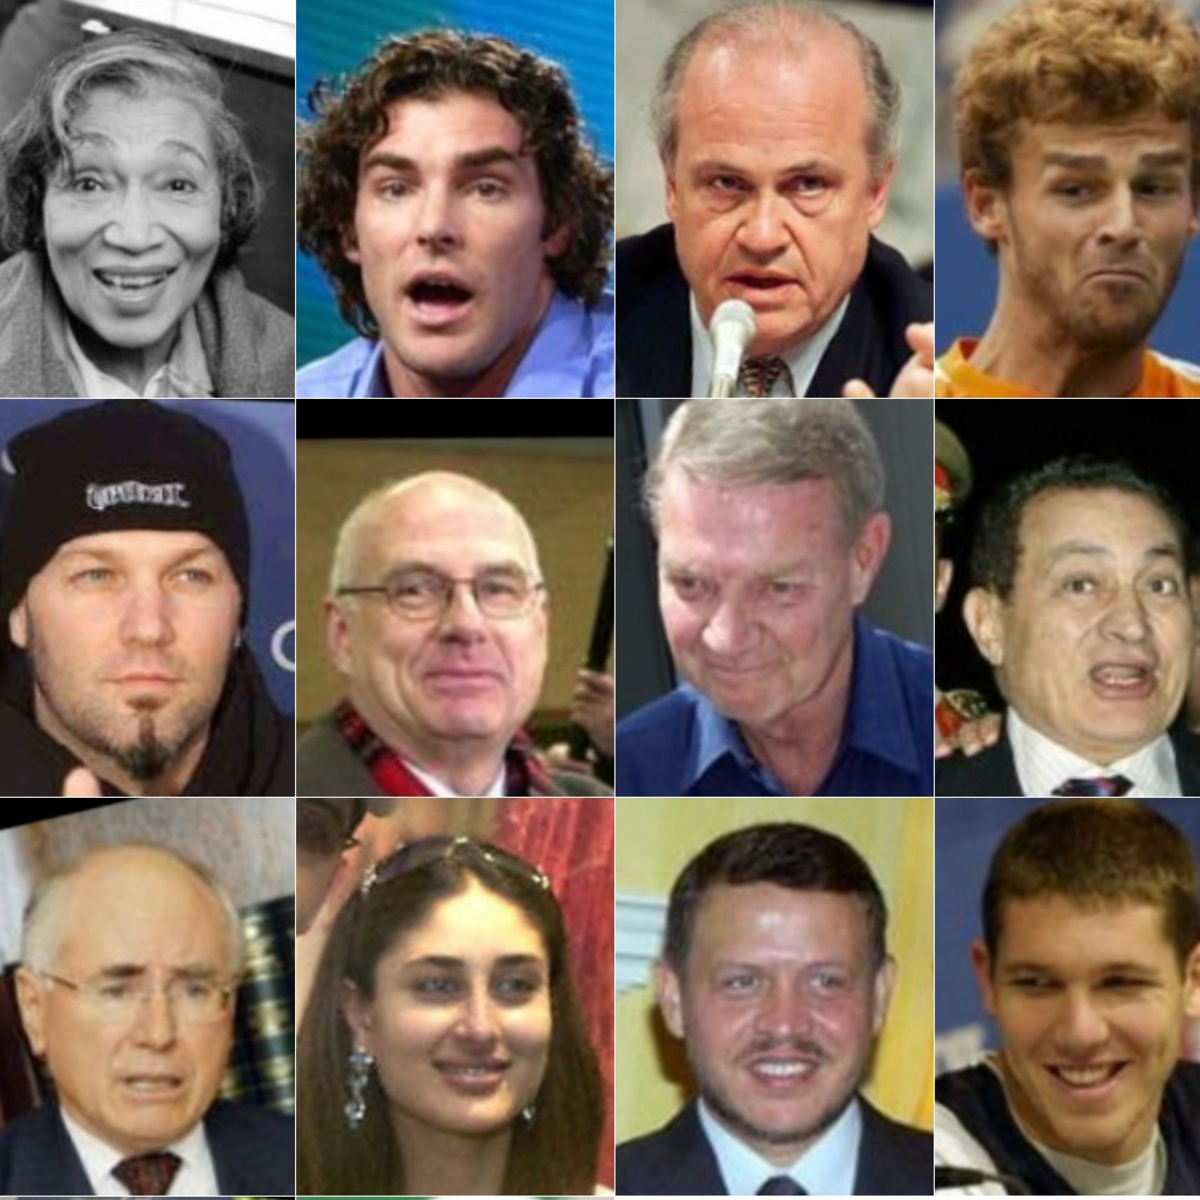

We selected only a few folders of images from the dataset and stored them as test and train data. The train directory has images from 10 different people in their seperate folders and the test directory has folders of images from 3 different people. The dataset is stored in a zip fomat. You can download it from https://drive.google.com/file/d/10vfLdoRAmCK-9rv_vFeINmZ-YjIYpGef/view?usp=sharing or you can download the entire dataset from the official website http://vis-www.cs.umass.edu/lfw/. 

A small dataset of better quality images is also provided. This contains handpicked high resolution images you can run the entire eqperiment on. You can download the data from https://drive.google.com/file/d/1eR0JGP0tWorRV0owU_ORdTNj5cTq3Tjv/view?usp=sharing

### Download and unzip the dataset

The dataset can be downloaded from https://drive.google.com/drive/folders/11tjrev0KC7obWyFAp4712Ewnk52S7Ynr?usp=sharing

In [6]:
# download face recognition data
!unzip -q 'face_recognition_dataset.zip' -d '/content/'

### Creating the database
This is the first part of our face recognition system. In this part we will create feature vectors of the entire dataset and save these images along with their paths in a database. For simplicity, this database would only be a numpy array. The entire step would be like this:


1.   Read Image.
2.   Align and Crop Image.
3.   Extract Features using ResNet Model.
4.   Save features in a database.


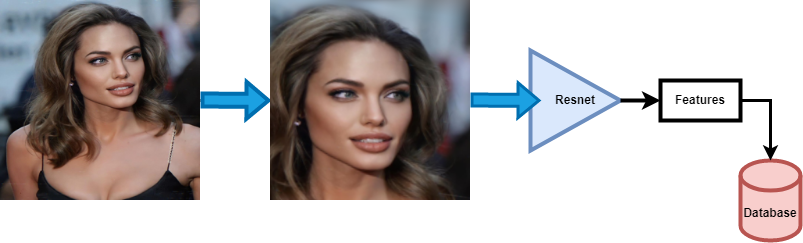

Directory structure should look like this:

    -Data folder
    --Person 1
        ---Image1.png
        ---Image2.png
        ---Image3.png
    --Person 2
        ---Image1.png
        ---Image2.png
        ---Image3.png 
                . 
                . 
                . 
                .

In [7]:
# Create the feature database
from face_recognition_utils import register_all_persons

path_dataset = '/content/face_recognition_dataset/train/'
save_dir = '/content/face_encodings_data/'
savename_encodings = 'encodings_2.npy'
savename_encodings_paths = 'encodings_paths_2.npy'

if not os.path.isdir(save_dir):
        os.mkdir(save_dir)

all_encodings, encoding_paths = register_all_persons(path_dataset, predictor, detector, face_rec_model)

np.save(os.path.join(save_dir,savename_encodings), all_encodings)
np.save(os.path.join(save_dir,savename_encodings_paths), encoding_paths) 


Total Images = 95
Finding embeddings for 95 images.


 57%|█████▋    | 54/95 [00:08<00:04,  9.04it/s]

Encoding shape (0,) is not equal to (1,128)
Please check!!!
/content/face_recognition_dataset/train/1/Martin_Scorsese_0002.jpg


100%|██████████| 95/95 [00:13<00:00,  7.19it/s]


A database of precalculated encodings is also provided for the ease. You can download them from https://drive.google.com/drive/folders/11tjrev0KC7obWyFAp4712Ewnk52S7Ynr?usp=sharing 

### Checking a face in the database
Once the database is created, you can search for a person by giving his/her picture as an input. The image will first be aligned and cropped and then its encodings are calculated. Then these encodings are compared with the ones already present in the database. If a match is found within the given thereshold then that person is deamed a match. Else it would return an error. 

Found 9 matching faces in the tolerance level 0.5
This person is: 5


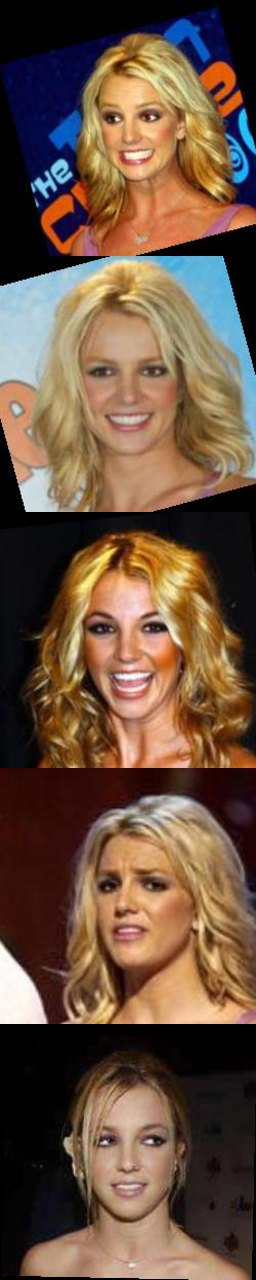

In [8]:
from load_and_preprocess_utils import load_img, read_matched_images, display_images_2
from face_recognition_utils import find_matches
import random

all_images = glob(path_dataset+'*/*')
img_path = random.sample(all_images,1)[0]
img = load_img(img_path)

threshold = 0.5 

matched_img_paths = find_matches(img, all_encodings, encoding_paths, predictor, detector, face_rec_model, threshold, max_imgs=5, find_nearest=False)
matched_images = read_matched_images(matched_img_paths)

# matched_images.insert(0,img)
display_images_2(matched_images)

### Testing a face that is not present in the database
If an input person's face is not present in the database then the matching distance would not be found within the given threshold value. And the system would return an error message.


/content/face_recognition_dataset/test/7/Tom_Cruise_0001.jpg
Found 0 matching faces in the tolerance level 0.5
Could not find the face in the system !


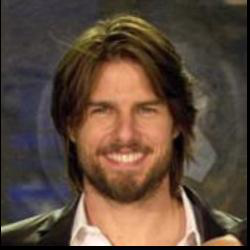

In [9]:
img_path = '/content/face_recognition_dataset/test/7/Tom_Cruise_0001.jpg'
img = load_img(img_path)
print(img_path)
matched_img_paths = find_matches(img, all_encodings, encoding_paths, predictor, detector, face_rec_model, threshold)
matched_images = read_matched_images(matched_img_paths)
# matched_images.insert(0,img)
# display_images_2(matched_images)
img

### Registering a new face
If you want to register a new face in the dataset, you have to provide the path to a folder containing the images of that person. The directory structure should look like this:
    
    -Person
        --Image1.png
        --Image2.png
               .
               .
               .
               .

In [10]:
from face_recognition_utils import register_new_person

path_new_person = '/content/face_recognition_dataset/test/7/'
savename_encodings_updated = 'encodings_2_updated.npy'
savename_encodings_paths_updated = 'encodings_paths_2_updated.npy'

if not os.path.isdir(save_dir):
    os.mkdir(save_dir)

# old encodings
all_encodings = np.load('/content/face_encodings_data/encodings_2.npy')
encoding_paths = np.load('/content/face_encodings_data/encodings_paths_2.npy')

all_encodings_updated, encoding_paths_updated = register_new_person(path_new_person, all_encodings, encoding_paths, predictor, detector, face_rec_model)

np.save(os.path.join(save_dir,savename_encodings_updated), all_encodings_updated)
np.save(os.path.join(save_dir,savename_encodings_paths_updated), encoding_paths_updated)  


Total Images = 10
Finding embeddings for 10 images.


100%|██████████| 10/10 [00:01<00:00,  8.86it/s]


A database of precalculated updated encodings is also provided for the ease. You can download them from https://drive.google.com/drive/folders/11tjrev0KC7obWyFAp4712Ewnk52S7Ynr?usp=sharing 

/content/face_recognition_dataset/test/7/Tom_Cruise_0001.jpg
Found 10 matching faces in the tolerance level 0.5
This person is: 7


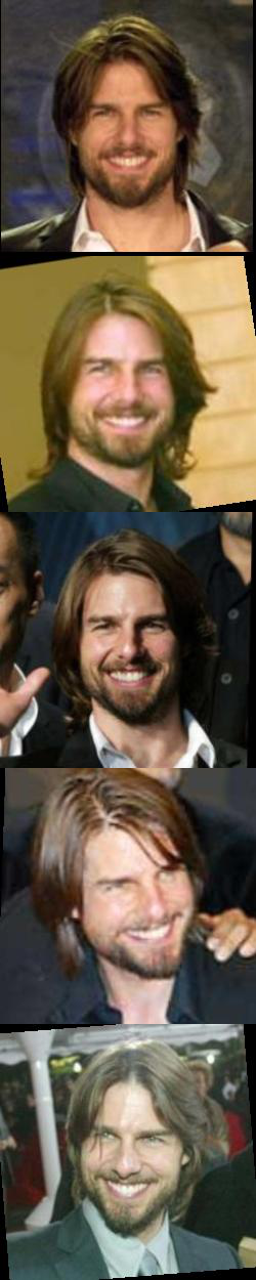

In [11]:
img_path = '/content/face_recognition_dataset/test/7/Tom_Cruise_0001.jpg'
img = load_img(img_path)
print(img_path)
matched_img_paths = find_matches(img, all_encodings_updated, encoding_paths_updated, predictor, detector, face_rec_model, threshold)
matched_images = read_matched_images(matched_img_paths)
# matched_images.insert(0,img)
display_images_2(matched_images)

### Registering multiple people at once to an existing database
If you want to register more than one person in the database, then you can do it by. An extra step would be to provide the existing database of features along with the paths.  Provide the images of different persons in the following directory structure:

    -Data folder
    --Person 1
        ---Image1.png
        ---Image2.png
        ---Image3.png
    --Person 2
        ---Image1.png
        ---Image2.png
        ---Image3.png 
                . 
                . 
                . 
                .

In [12]:
from face_recognition_utils import register_multiple_persons

path_multiple_persons = '/content/face_recognition_dataset/test/'
all_encodings_updated, encoding_paths_updated = register_multiple_persons(path_multiple_persons, all_encodings, encoding_paths, predictor, detector, face_rec_model)

np.save(os.path.join(save_dir,savename_encodings_updated), all_encodings_updated)
np.save(os.path.join(save_dir,savename_encodings_paths_updated), encoding_paths_updated) 

Total Images = 15
Finding embeddings for 15 images.


100%|██████████| 15/15 [00:01<00:00,  9.48it/s]


Total Images = 10
Finding embeddings for 10 images.


100%|██████████| 10/10 [00:01<00:00,  8.76it/s]


Total Images = 3
Finding embeddings for 3 images.


100%|██████████| 3/3 [00:00<00:00,  9.21it/s]
